In [7]:
import tensorflow as tf
#usually tensorflow.keras.models hota hai. but we are writing so 
#because we have the keras file directly installed
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from keras.models import Sequential

import numpy as nump

import matplotlib.pyplot as plot

In [40]:
#Going to do binary image classification with cnn with tensorflow 

"""Data set loading..."""


#importing images here
L_train= nump.loadtxt("Image Classification CNN Keras Dataset/input.csv" , delimiter=",")
M_train= nump.loadtxt("Image Classification CNN Keras Dataset/labels.csv" , delimiter=",")

L_test=nump.loadtxt("Image Classification CNN Keras Dataset/input_test.csv" , delimiter=",")
M_test=nump.loadtxt("Image Classification CNN Keras Dataset/labels_test.csv" , delimiter=",")

#resizing them in
L_train=nump.reshape(L_train,(len(L_train),100,100,3))
M_train=nump.reshape(M_train,(len(M_train),1))

L_test=nump.reshape(L_test,(len(L_test),100,100,3))
M_test=nump.reshape(M_test,(len(M_test),1))

#we want our pixil to be between to 0 to 1
L_train=L_train/255.0
M_train=M_train/255.0

In [29]:

"""Model sequence"""
model=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(100,100,3)),
    MaxPool2D((2,2)),

    Conv2D(32,(3,3),activation="relu"),
    MaxPool2D((2,2)),

    Flatten(),
    Dense(64,activation="relu"),
    
    Dense(1,activation="sigmoid")
])

In [30]:

"""Model cost function and backpropagation algo"""
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

model.fit(L_train,M_train, epochs=5,batch_size=64)


Epoch 1/5
32/32 [==============================] - 14s 401ms/step - loss: 0.0443 - accuracy: 0.4910
Epoch 2/5
32/32 [==============================] - 13s 398ms/step - loss: 0.0156 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 13s 411ms/step - loss: 0.0145 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 14s 428ms/step - loss: 0.0142 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 15s 452ms/step - loss: 0.0141 - accuracy: 0.5000


Epoch 1/5
32/32 [==============================] - 13s 391ms/step - loss: 0.0140 - accuracy: 0.5000
Epoch 2/5
32/32 [==============================] - 13s 397ms/step - loss: 0.0137 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 13s 406ms/step - loss: 0.0137 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 12s 384ms/step - loss: 0.0136 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 13s 419ms/step - loss: 0.0135 - accuracy: 0.5000


In [ ]:

"""Model cost function and backpropagation algo"""
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

model.fit(L_train,M_train, epochs=5,batch_size=64)

In [31]:
model.evaluate(L_test,M_test)

13/13 [==============================] - 1s 46ms/step - loss: 390.8153 - accuracy: 0.5000


[390.8153381347656, 0.5]

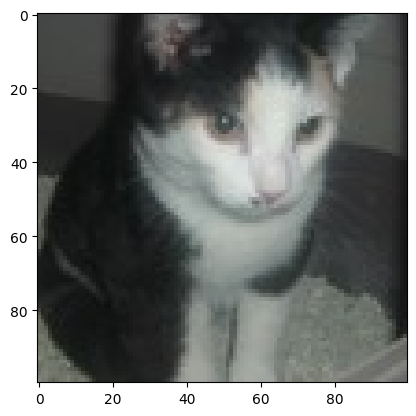

In [56]:
x="https://img.freepik.com/free-photo/isolated-happy-smiling-dog-white-background-portrait-4_1562-693.jpg?w=1060&t=st=1692020253~exp=1692020853~hmac=26fc9a9faeca12b7774bb06c81265ba19303f7b1b7ca51252e3032dce8fc54d4"
imageToPredict=x
import random

index=random.randint(0,len(L_train))

plot.imshow(L_train[index])


1/1 [==============================] - 0s 24ms/step
[[0.00217614]]
it is a cat


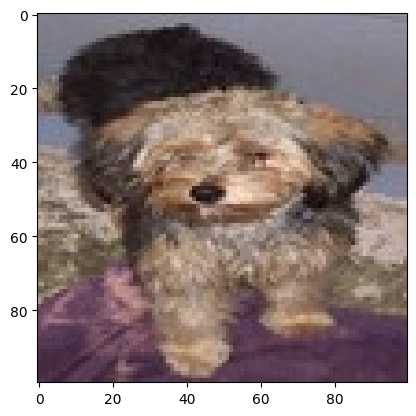

In [81]:
x="https://img.freepik.com/free-photo/isolated-happy-smiling-dog-white-background-portrait-4_1562-693.jpg?w=1060&t=st=1692020253~exp=1692020853~hmac=26fc9a9faeca12b7774bb06c81265ba19303f7b1b7ca51252e3032dce8fc54d4"
imageToPredict=x
import random

index=random.randint(0,len(L_train))


plot.imshow(L_train[index])

predictionvalue=model.predict(nump.reshape(L_train[index],(1,100,100,3)))
print(predictionvalue)
if predictionvalue>=0.5:
    print("it is a dog")
else:
    print("it is a cat")